## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing The Dataset

In [20]:
url = "datasets/breast-cancer-dataset-predict.csv"
data = pd.read_csv(url)

## Pre-processing Dataset

In [21]:
data.head()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               213 non-null    int64 
 1   Year              213 non-null    object
 2   Age               213 non-null    int64 
 3   Menopause         213 non-null    int64 
 4   Tumor Size (cm)   213 non-null    object
 5   Inv-Nodes         213 non-null    object
 6   Breast            213 non-null    object
 7   Metastasis        213 non-null    object
 8   Breast Quadrant   213 non-null    object
 9   History           213 non-null    object
 10  Diagnosis Result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [23]:
data = data.drop(columns=['S/N'], axis=1)
data = data.drop(columns=['Year'], axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               213 non-null    int64 
 1   Menopause         213 non-null    int64 
 2   Tumor Size (cm)   213 non-null    object
 3   Inv-Nodes         213 non-null    object
 4   Breast            213 non-null    object
 5   Metastasis        213 non-null    object
 6   Breast Quadrant   213 non-null    object
 7   History           213 non-null    object
 8   Diagnosis Result  213 non-null    object
dtypes: int64(2), object(7)
memory usage: 15.1+ KB


In [25]:
print(data.isna().sum())

Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64


In [26]:
print("Duplicae Data: ", data.duplicated().sum())

Duplicae Data:  2


In [27]:
data = data.dropna()


In [28]:
data.drop_duplicates(inplace=True)

In [29]:
print(data.isna().sum())


Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64


In [30]:
print("Duplicae Data: ", data.duplicated().sum())

Duplicae Data:  0


In [31]:
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"Unique values in column [{column}] : {unique_values}")
        count_hash = (data[column] == '#').sum()
        print(f"Number of rows with '#' in [{column}]: {count_hash}\n")

Unique values in column [Tumor Size (cm)] : ['2' '4' '3' '1' '5' '6' '7' '10' '8' '9' '#' '14' '12']
Number of rows with '#' in [Tumor Size (cm)]: 1

Unique values in column [Inv-Nodes] : ['0' '1' '#' '3']
Number of rows with '#' in [Inv-Nodes]: 1

Unique values in column [Breast] : ['Right' 'Left' '#']
Number of rows with '#' in [Breast]: 6

Unique values in column [Metastasis] : ['0' '1' '#']
Number of rows with '#' in [Metastasis]: 1

Unique values in column [Breast Quadrant] : ['Upper inner' 'Upper outer' 'Lower outer' 'Lower inner' '#'
 'Upper outer ']
Number of rows with '#' in [Breast Quadrant]: 2

Unique values in column [History] : ['0' '1' '#']
Number of rows with '#' in [History]: 2

Unique values in column [Diagnosis Result] : ['Benign' 'Malignant']
Number of rows with '#' in [Diagnosis Result]: 0



In [32]:
for column in data.columns:
    if data[column].dtype == 'object':
        mode_value = data[column].mode()[0]
        data[column] = data[column].replace('#', mode_value)

In [33]:
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"Unique values in column [{column}] : {unique_values}")
        count_hash = (data[column] == '#').sum()
        print(f"Number of rows with '#' in [{column}]: {count_hash}\n")

Unique values in column [Tumor Size (cm)] : ['2' '4' '3' '1' '5' '6' '7' '10' '8' '9' '14' '12']
Number of rows with '#' in [Tumor Size (cm)]: 0

Unique values in column [Inv-Nodes] : ['0' '1' '3']
Number of rows with '#' in [Inv-Nodes]: 0

Unique values in column [Breast] : ['Right' 'Left']
Number of rows with '#' in [Breast]: 0

Unique values in column [Metastasis] : ['0' '1']
Number of rows with '#' in [Metastasis]: 0

Unique values in column [Breast Quadrant] : ['Upper inner' 'Upper outer' 'Lower outer' 'Lower inner' 'Upper outer ']
Number of rows with '#' in [Breast Quadrant]: 0

Unique values in column [History] : ['0' '1']
Number of rows with '#' in [History]: 0

Unique values in column [Diagnosis Result] : ['Benign' 'Malignant']
Number of rows with '#' in [Diagnosis Result]: 0



In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [35]:
data.head()

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,40,1,4,0,1,0,2,0,0
1,39,1,4,0,0,0,3,0,0
2,45,0,6,0,0,0,1,0,0
3,26,1,5,0,0,0,0,1,0
4,21,1,0,0,1,0,3,1,0


In [36]:
data = data.astype(int)

In [37]:
data.describe()

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,39.781991,0.668246,5.393365,0.345972,0.464455,0.341232,1.658768,0.412322,0.436019
std,14.130004,0.471963,2.979574,0.486700,0.499921,0.475251,1.149392,0.493423,0.497069
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,40.000000,1.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,49.000000,1.000000,7.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,11.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<Axes: >

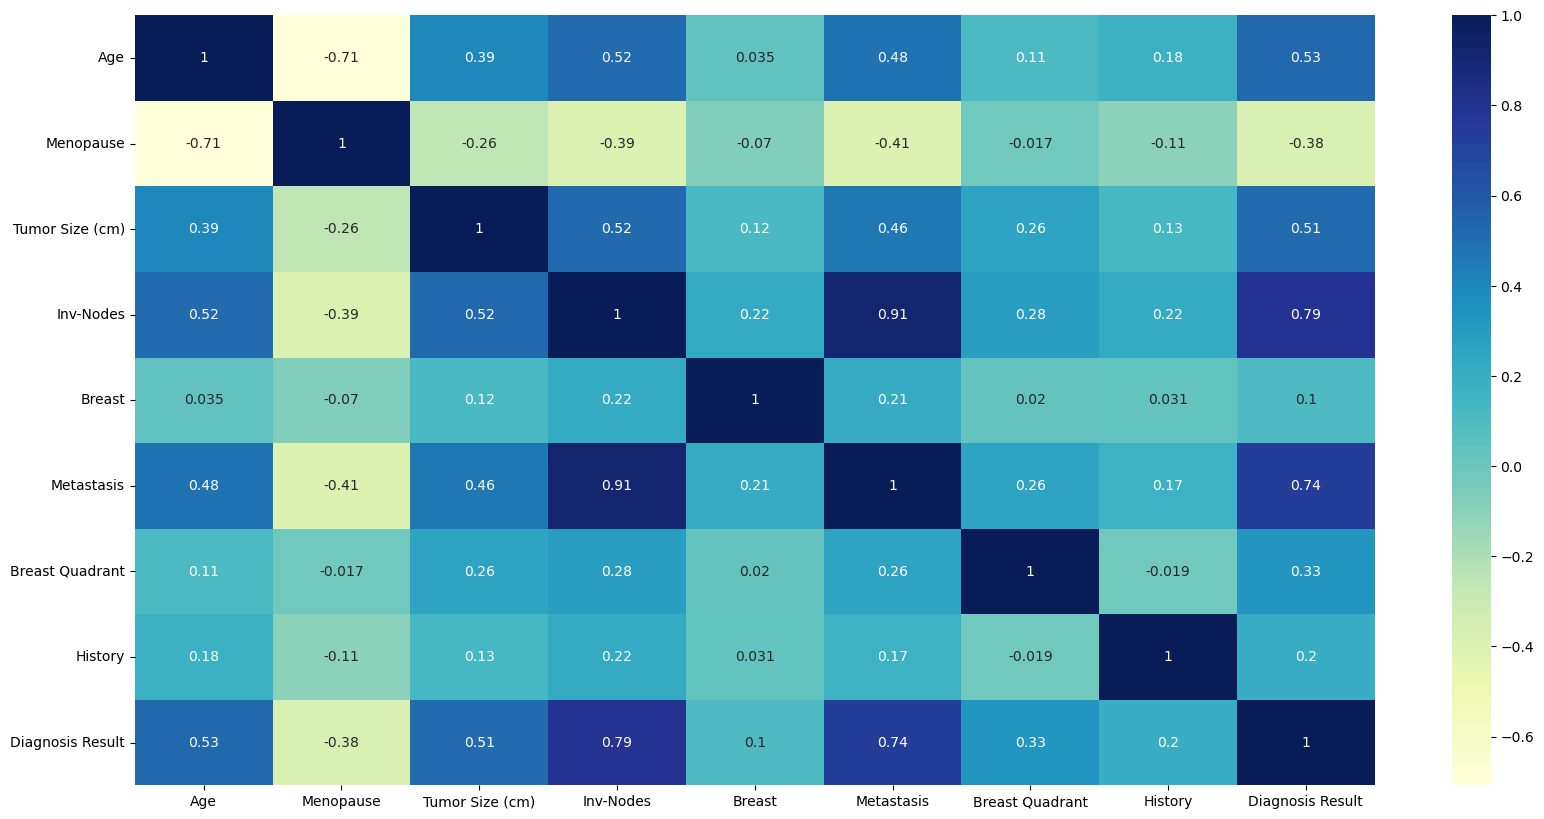

In [38]:
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Splitting The Dataset (Base)

In [39]:
x = data.drop(columns=['Diagnosis Result'], axis=1).values
y = data['Diagnosis Result'].values 

In [40]:
print("Type of x:", type(x))
print("Shape of x:", x.shape)
print("Data type of x elements:", x.dtype)
print("First 5 elements of x:\n", x[:5])

Type of x: <class 'numpy.ndarray'>
Shape of x: (211, 8)
Data type of x elements: int32
First 5 elements of x:
 [[40  1  4  0  1  0  2  0]
 [39  1  4  0  0  0  3  0]
 [45  0  6  0  0  0  1  0]
 [26  1  5  0  0  0  0  1]
 [21  1  0  0  1  0  3  1]]


In [41]:
print("Type of y:", type(y))
print("Shape of y:", y.shape)
print("Data type of y elements:", y.dtype)
print("First 5 elements of y:\n", y[:5])

Type of y: <class 'numpy.ndarray'>
Shape of y: (211,)
Data type of y elements: int32
First 5 elements of y:
 [0 0 0 0 0]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (168, 8)
X_test shape: (43, 8)
y_train shape: (168,)
y_test shape: (43,)


In [44]:
print("\nX_train sample:")
print(X_train[:1])
print("\nX_test sample:")
print(X_test[:1])
print("\ny_train sample:")
print(y_train[:1])
print("\ny_test sample:")
print(y_test[:1])


X_train sample:
[[35  1  8  1  0  1  3  0]]

X_test sample:
[[56  0 11  1  0  1  3  0]]

y_train sample:
[1]

y_test sample:
[1]


## Train XGBoost Model On Base Dataset

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
print(f'Best XGB parameters: {best_params_xgb}')

Best XGB parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=1.0,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Base Model Evaluation (XGBoost)

In [47]:
y_pred = xgb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('XGBoost Model Performance On Original Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On Original Dataset
Accuracy: 0.91
Precision: 0.92
Recall: 0.80
F1-score: 0.86


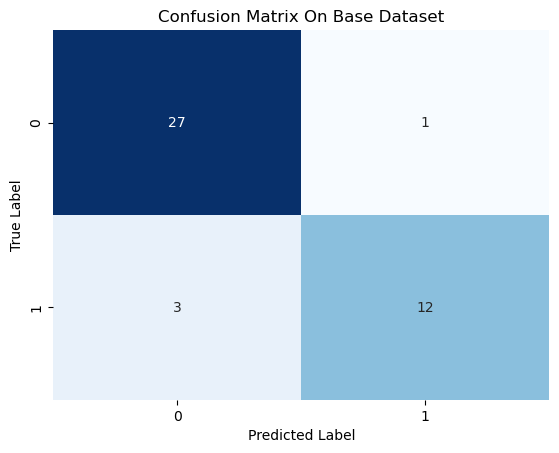

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix On Base Dataset')
plt.show()

## Scaling The Dataset

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

## PCA

In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_base_model = xgb.XGBClassifier(**best_params_xgb, eval_metric='logloss')

# Definisikan pipeline dengan PCA dan XGBoost
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('xgb', xgb_base_model)
])

# Definisikan parameter grid untuk PCA
param_grid_pca = {
    'pca__n_components': [2, 3, 4, 5, 6]
}

# Lakukan Grid Search dengan pipeline
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5)
try:
    grid_search_pca.fit(features_scaled, y)
    # Dapatkan parameter terbaik
    best_params_pca = grid_search_pca.best_params_
    print(f'Best PCA parameters: {best_params_pca}')
except Exception as e:
    print(f"Grid search failed with error: {e}")


Best PCA parameters: {'pca__n_components': 4}


In [51]:
from sklearn.decomposition import PCA

# Inisialisasi dan transformasi dengan PCA
pca_model = PCA(n_components=4)
features_reduced_pca = pca_model.fit_transform(features_scaled)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled.shape}')
print(f'PCA reduced shape: {features_reduced_pca.shape}')

Original shape: (211, 8)
PCA reduced shape: (211, 4)


## Splitting The Dataset (After Feature Reduced With PCA)

In [52]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(features_reduced_pca, y, test_size=0.2, random_state=42)

In [53]:
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (168, 4)
X_pca_test shape: (43, 4)
y_pca_train shape: (168,)
y_pca_test shape: (43,)


In [48]:
print("\nX_pca_train sample:")
print(X_pca_train[:1])
print("\nX_pca_test sample:")
print(X_pca_test[:1])
print("\ny_pca_train sample:")
print(y_pca_train[:1])
print("\ny_pca_test sample:")
print(y_pca_test[:1])


X_pca_train sample:
[[-0.98238705  1.99954778]]

X_pca_test sample:
[[ 2.51224551 -0.82149476]]

y_pca_train sample:
[0]

y_pca_test sample:
[1]


## Train The Model (After Feature Reduced With PCA) 

In [54]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_pca = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=1.0,
    eval_metric='logloss'
)

xgb_model_pca.fit(X_pca_train, y_pca_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pca_pred = xgb_model_pca.predict(X_pca_test) 
accuracy = accuracy_score(y_pca_test, y_pca_pred)
precision = precision_score(y_pca_test, y_pca_pred)
recall = recall_score(y_pca_test, y_pca_pred)
f1 = f1_score(y_pca_test, y_pca_pred)

print('XGBoost Model Performance On PCA Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On PCA Reduced Dataset
Accuracy: 0.91
Precision: 0.92
Recall: 0.80
F1-score: 0.86


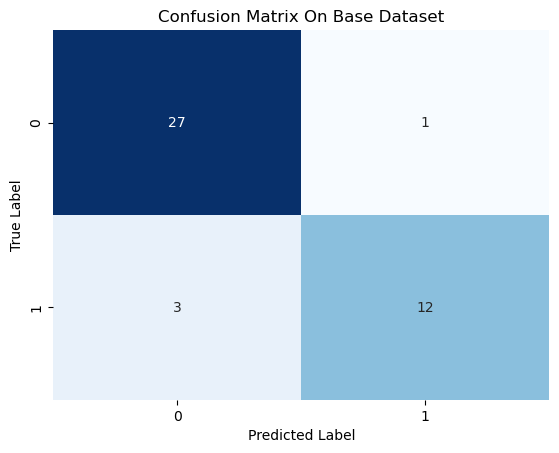

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_pca_test, y_pca_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix On Base Dataset')
plt.show()

## UMAP

### Adding noise to prevent UMAP spektral initiantion failure

In [57]:
import numpy as np

features_scaled_noisy = features_scaled + np.random.normal(0, 0.01, features_scaled.shape)

In [58]:
import numpy as np

# Periksa apakah ada nilai NaN
print("Any NaN in features_scaled_noisy:", np.isnan(features_scaled_noisy).any())

# Periksa apakah ada nilai tidak terhingga
print("Any infinity in features_scaled_noisy:", np.isinf(features_scaled_noisy).any())


Any NaN in features_scaled_noisy: False
Any infinity in features_scaled_noisy: False


In [59]:
import umap.umap_ as umap
from sklearn.pipeline import Pipeline

# Gunakan parameter XGBoost terbaik yang ditemukan
xgb_base_model = xgb.XGBClassifier(**best_params_xgb, eval_metric='logloss')

# Definisikan pipeline dengan UMAP dan XGBoost
pipeline_umap = Pipeline([
    ('umap', umap.UMAP()),
    ('xgb', xgb_base_model)
])

# Definisikan parameter grid untuk UMAP dan XGBoost
param_grid_umap = {
    'umap__n_neighbors': [5, 10, 15, 20],
    'umap__n_components': [2, 3, 4, 5, 6, 7],
    'umap__min_dist': [0.0, 0.1, 0.3, 0.5],
    'umap__metric': ['euclidean', 'manhattan'],
    'umap__n_epochs': [200, 400, 600], 
    'umap__init': ['random']  
}

# Lakukan Grid Search dengan pipeline
grid_search_umap = GridSearchCV(pipeline_umap, param_grid_umap, cv=5)
try:
    grid_search_umap.fit(features_scaled_noisy, y)
    # Dapatkan parameter terbaik
    best_params_umap = grid_search_umap.best_params_
    print(f'Best UMAP parameters: {best_params_umap}')
except Exception as e:
    print(f"Grid search failed with error: {e}")

Best UMAP parameters: {'umap__init': 'random', 'umap__metric': 'manhattan', 'umap__min_dist': 0.0, 'umap__n_components': 6, 'umap__n_epochs': 600, 'umap__n_neighbors': 10}


In [60]:
import umap.umap_ as umap

# Inisialisasi dan transformasi dengan UMAP
umap_model= umap.UMAP(
    n_neighbors=10,
    n_components=6,
    min_dist=0.0,
    metric='manhattan',
    n_epochs=600,
    init='random'
)
features_reduced_umap = umap_model.fit_transform(features_scaled_noisy)

# Memeriksa bentuk hasil transformasi
print(f'Original shape: {features_scaled_noisy.shape}')
print(f'UMAP reduced shape: {features_reduced_umap.shape}')

Original shape: (211, 8)
UMAP reduced shape: (211, 6)


## Splitting The Dataset (After Feature Reduced With UMAP)

In [61]:
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(features_reduced_umap, y, test_size=0.2, random_state=42)

In [62]:
print("X_umap_train shape:", X_umap_train.shape)
print("X_umap_test shape:", X_umap_test.shape)
print("y_umap_train shape:", y_umap_train.shape)
print("y_umap_test shape:", y_umap_test.shape)

X_umap_train shape: (168, 6)
X_umap_test shape: (43, 6)
y_umap_train shape: (168,)
y_umap_test shape: (43,)


In [63]:
print("\nX_umap_train sample:")
print(X_umap_train[:1])
print("\nX_umap_test sample:")
print(X_umap_test[:1])
print("\ny_umap_train sample:")
print(y_umap_train[:1])
print("\ny_umap_test sample:")
print(y_umap_test[:1])


X_umap_train sample:
[[7.2230144 3.8388262 6.380809  4.555288  1.3641324 7.0825768]]

X_umap_test sample:
[[ 9.912496    5.1304693   7.1166673   1.1072903  -0.35721603  8.901602  ]]

y_umap_train sample:
[1]

y_umap_test sample:
[1]


## Train The Model (After Feature Reduced With UMAP) 

In [64]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model_umap = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=1.0,
    eval_metric='logloss'
)

xgb_model_umap.fit(X_umap_train, y_umap_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [65]:
y_umap_pred = xgb_model_umap.predict(X_umap_test) 
accuracy = accuracy_score(y_umap_test, y_umap_pred)
precision = precision_score(y_umap_test, y_umap_pred)
recall = recall_score(y_umap_test, y_umap_pred)
f1 = f1_score(y_umap_test, y_umap_pred)

print('XGBoost Model Performance On UMAP Reduced Dataset')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

XGBoost Model Performance On UMAP Reduced Dataset
Accuracy: 0.93
Precision: 1.00
Recall: 0.80
F1-score: 0.89


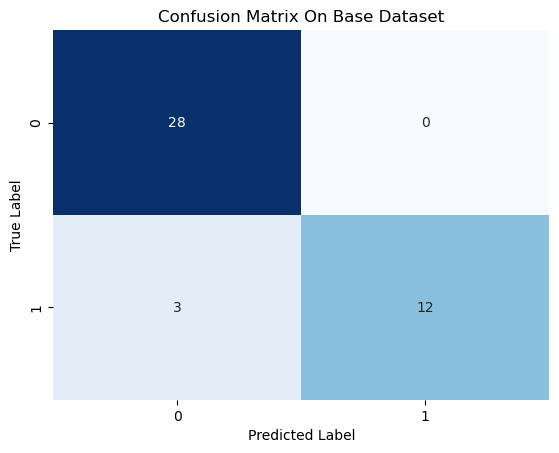

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_umap_test, y_umap_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix On Base Dataset')
plt.show()